# Multiple linear regression

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In this assignment, we will use data from a dataset with car data. We're going to predict the price of a car.
1. Start with reading the data and analyse the first rows

In [3]:
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


2. Check for more info on the variables: nr of rows, NaN, mean etc. And delete variables of which metadata is missing.

In [6]:
df.dropna()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


3. Visualize variables which raise questions, since some of the data looks extreme. Analyse possible erroneous data and drop these rows.

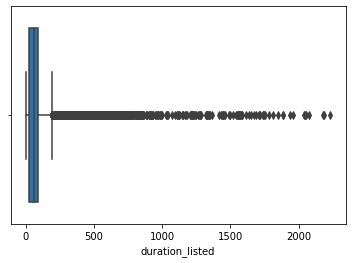

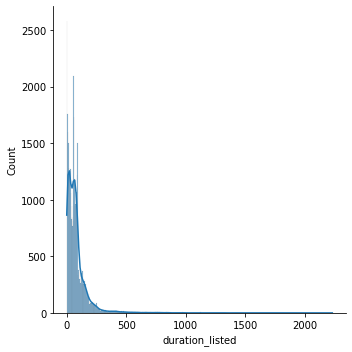

In [5]:
sns.boxplot(x='duration_listed', data=df)
plt.show()
sns.displot(x='duration_listed', kde=True, data=df)
plt.show()

In [9]:
df_select = df[df['price_usd'] <  100]
df_select.head(11)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8230,ВАЗ,2105,mechanical,red,999999,1991,gasoline,False,gasoline,1.2,...,False,False,False,False,False,False,False,False,False,1
8263,ВАЗ,2109,mechanical,blue,225477,1991,gasoline,False,gasoline,1.3,...,False,False,False,False,False,True,False,True,False,14
8770,Fiat,Palio,mechanical,red,260000,1998,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,2
12809,Renault,19,mechanical,blue,99999,1992,gasoline,False,gasoline,1.7,...,False,False,False,False,False,False,False,False,False,3
12810,Renault,19,mechanical,blue,99999,1992,gasoline,False,gasoline,1.7,...,False,False,False,False,False,False,False,False,False,3
16205,Volkswagen,Jetta,mechanical,silver,200,1996,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,False,False,2
16406,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,False,diesel,2.4,...,False,False,False,False,False,False,False,False,False,3
27570,BMW,523,mechanical,blue,450000,1999,gasoline,False,gasoline,2.5,...,False,False,False,True,True,False,False,False,False,1
30149,Mazda,626,mechanical,black,300000,1987,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,0
34365,Mercedes-Benz,T1,mechanical,white,450000,1990,diesel,False,diesel,2.9,...,False,False,False,False,False,False,False,False,False,2


## Selecting variables

By looking at the correlations between *price* and the other variables, we can decide which variables to include. 

4. Calculate the correlation of the numerical variables and also show them in a pairplot. Drop variables with very low correlations

5. Let's include the categorical variables which probably influence the price. You will need to convert them to dummies. First check the categories if you don't know what values they contain. Finally drop the categorical data you don't want to include.

6. Check for NA's and drop them

## Fitting the model

We will split our data, train our model and then test it. 

7. Let's first create the *X* and *y* variables.

8. Split the data in 70/30, 70% training set and 30% test set.

9. Now let's create the model and train it. Also calculate the intercept and slopes

Going from the general formula of $ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 .. b_nx_n + e$

## Evaluating the model

10. Now let's evaluate the model's performance. We'll start by calculating the  R2 and next the RMSE

11. Let's plot the predictions to see where our model predicts best.